# Assignment 5 - Predicive Analysis (Multiple Linear Regression)

**Developer:** Mark Trombly

**Course:** Artificial Intelligence Applications

**Program Requirements:**

1. Contrast similarities/differences among AI vs. Machine-Learning vs. Deep-Learning
2. Identify correlations
3. Use Seaborn (data visualization library built on top of matplotlib)
4. Graph correlations
5. Use *multiple* linear regression
6. Create linear model
7. Plot regression line
8. Make predictions - using simple linear regression model
9. Plot residuals

# Regression Analysis

**Goal:** Find the best fitting line which can accurately predict the output.

**Fundamentals:**

*Dependent* variables (DVs) (**output on y-axis**): *always* variables *being studied*--that is, whose variation(s) is/are being modified somehow!

*Independent* variables (IVs) (**input on x-axis**): *always* variables being manipulated, to study and compare effects on DV(s).

**Note:** The designations *independent* and *dependent* variables are used to not imply "cause and effect" (as do "predictor" or "explanatory" terms).

**Note:** Based on the number of input and output variables, linear regression has three types:

1. Simple linear regression (1 DV/1 IV)
2. Multiple linear regression (1 DV/2 or more IVs)
3. Multivariate linear regression (2 or more DVs/2 or more IVs)

**Simple linear regression:** Only **one** *independent* variable affecting **one** *dependent* variable.

**Multiple linear regression: Two or more** *independent* variables affecting **one** *dependent* variable.

**Multivariate linear regression: Two or more** *independent* variables affecting **two or more** *dependent* variables.

# Correlation Does ***Not*** Imply Causation!

### **Famous Example:** Ice cream consumption (purchases) causes shark attacks??!!

**WHAT?!!**

**ANOTHER REASON *NOT* TO EAT ICE CREAM?!! ;)**

**Truth:** Ice cream sales and monthly shark attacks around the United States each year ***are*** highly correlated.

**Therefore,** if you buy ice cream you are more likely to be eaten by a shark!! 8))

**REALITY:** More people consume ice cream and go into waters where sharks are located--when it's ***warmer*** outside!!

![](https://www.statology.org/wp-content/uploads/2021/08/corrCause1-768x557.png)

Figure1. [https://www.statology.org/correlation-does-not-imply-causation-examples/](https://www.statology.org/correlation-does-not-imply-causation-examples/)

# Supervised vs. Unsupervised Learning

- Supervised learning: Prior knowledge of what output values for samples should be.
- Unsupervised learning: Does not have labeled outputs. Goal is to infer natural structure present within a set of dat points.

**References:**

Bad link->[https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning](https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning)

[https://www.ibm.com/think/topics/supervised-vs-unsupervised-learning](https://www.ibm.com/think/topics/supervised-vs-unsupervised-learning)

[https://www.seldon.io/supervised-vs-unsupervised-learning-explained](https://www.seldon.io/supervised-vs-unsupervised-learning-explained)


# Import libraries

In [1]:
# 1. necessary libraries:
# pandas and numpy libraries to perform mathematical functions
# matplotlib and seaborn libraries to visualize data
# LinearRegression: models relationships between DVs, and given set of IVs
# train_test_split: splits dataset into training and test datasets

# Note: Seaborn provides more visualization patterns, with less syntax than matplotlib

import sys
import os
import pandas as pd
print(sys.version) # print python version
print(os.environ['CONDA_DEFAULT_ENV']) # print conda environment

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
testenv


# Get data

**Fish Properties:**

- Species: Species name
- Weight: Weight in grams
- Length1: Vertical length in centimeters
- Length2: Diagonal length in centimeters
- Length3: Cross length in centimeters
- Height: Height in centimeters
- Width: Width in centimeters

In [2]:
# 2. assign cleaned .csv file to "fish" variable
# Read given CSV file, and view some sample records
fish = pd.read_csv('fish.csv')

# display first and last 5 records
fish

# fish.head() # display first 5 records
# fish.tail() # display last 5 records

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Clean data

In [3]:
# 3. Rename cols to differentiate "Length" properties, then display 1st 5 records
fish.rename(columns={'Length1' : 'VerticalLength',
                     'Length2' : 'DiagonalLength',
                     'Length3' : 'CrossLength'}, inplace=True)

fish.head() # display first 5 records

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Analyze dataset

In [4]:
# 4. print number of rows and columns
fish.shape

(159, 7)

In [5]:
# 5. print dataframe info (Note: also, indicates null values, which, if present, would need to be remedied.)
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   VerticalLength  159 non-null    float64
 3   DiagonalLength  159 non-null    float64
 4   CrossLength     159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# 6. print dataframe statistics summary
fish_describe = fish.describe()

# format entire dataframe to two decimal places
pd.options.display.float_format = "{:,.2f}".format

print(fish_describe)

        Weight  VerticalLength  DiagonalLength  CrossLength  Height  Width
count   159.00          159.00          159.00       159.00  159.00 159.00
mean    398.33           26.25           28.42        31.23    8.97   4.42
std     357.98           10.00           10.72        11.61    4.29   1.69
min       0.00            7.50            8.40         8.80    1.73   1.05
25%     120.00           19.05           21.00        23.15    5.94   3.39
50%     273.00           25.20           27.30        29.40    7.79   4.25
75%     650.00           32.70           35.50        39.65   12.37   5.58
max   1,650.00           59.00           63.40        68.00   18.96   8.14


# Identify correlations

In [7]:
# 7. Display pairwise correlations of *all* columns in dataframe.
fish.corr(numeric_only = True).head()

# Note: "Perfect" correlations (1.0) with same attributes (e.g., "Weight" and "Weight").
# Note: High correclations among *all* Lengths, as well as "Width" and "Height" attributes.

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
Weight,1.00,0.92,0.92,0.92,0.72,0.89
VerticalLength,0.92,1.00,1.00,0.99,0.63,0.87
DiagonalLength,0.92,1.00,1.00,0.99,0.64,0.87
CrossLength,0.92,0.99,0.99,1.00,0.70,0.88
Height,0.72,0.63,0.64,0.70,1.00,0.79


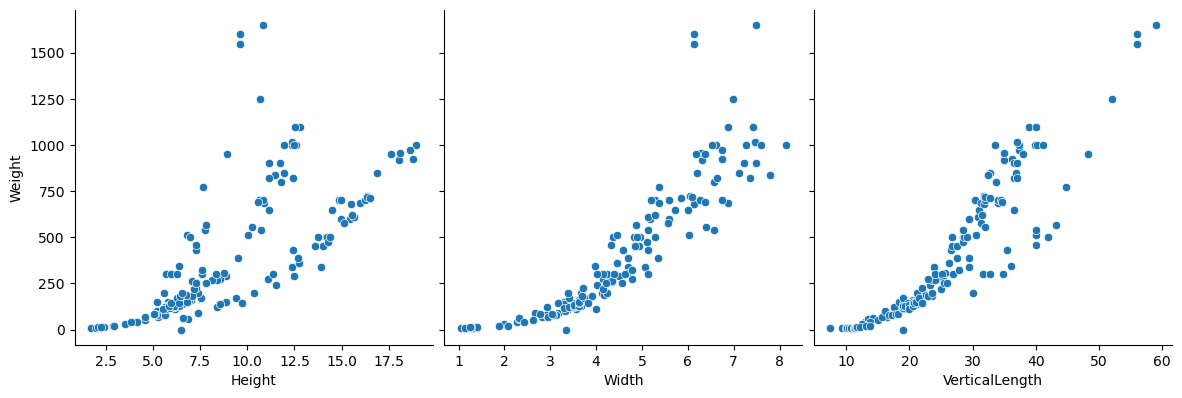

In [8]:
# 8. visualize data for correlations using pairplot(). y=DV(s), x=IV(s)
# pairplot(): Plot pairwise relationships in dataset.
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Note: scatter plot good when comparing two numeric variables, like here!
sns.pairplot(fish, x_vars=['Height', 'Width', 'VerticalLength'], y_vars='Weight', height=4, aspect=1, kind='scatter')
plt.show()

In [9]:
# 9. Custom visualizations
# Color paletts:
# https://seaborn.pydata.org/generated/seaborn.color_palette.html
# https://seaborn.pydata.org/tutorial/color_palettes.html

# display all colors from current default color cycle
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
# 10. display color palette referenced by name
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [11]:
# 11. display color values as hex codes:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


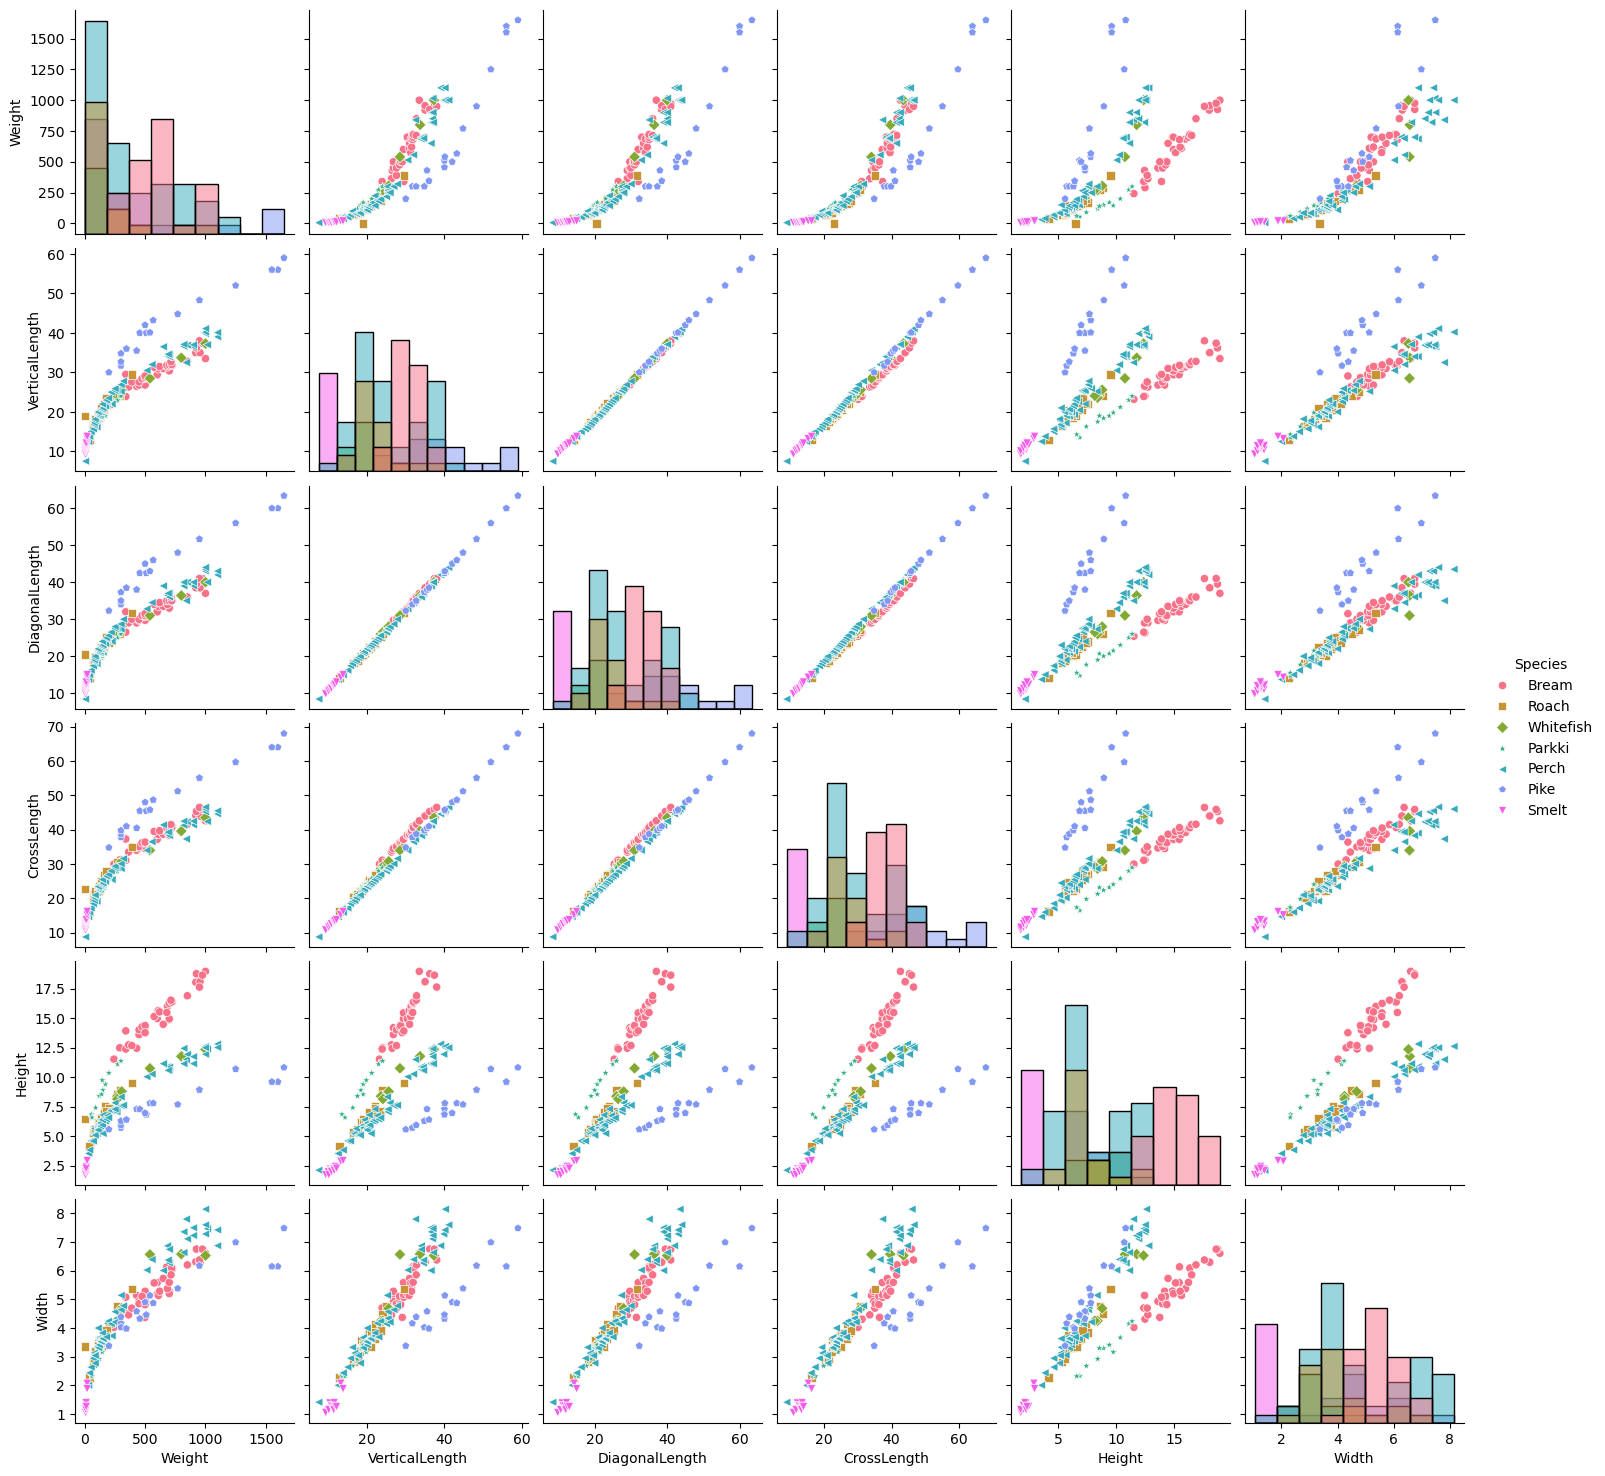

In [12]:
# 12. Custom plotting
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://python-charts.com/correlation/pairs-plot-seaborn/
# https://python-charts.com/correlation/scatter-plot-group-seaborn/#customization
# Also, do your *own* research for the types of markers and palettes that can be used!
sns.pairplot(fish, hue="Species", diag_kind="hist", markers=["o", "s", "D", "*", "<", "p", "v"], palette = "husl")

In [13]:
# 13. Display one attribute's correlation ("Weight") to *all* other columns in dataframe, sorted in descending order by weight.
fish.corr(numeric_only = True)[['Weight']].sort_values(by='Weight', ascending=False)

,Weight
Weight,1.00
CrossLength,0.92
DiagonalLength,0.92
VerticalLength,0.92
Width,0.89
Height,0.72


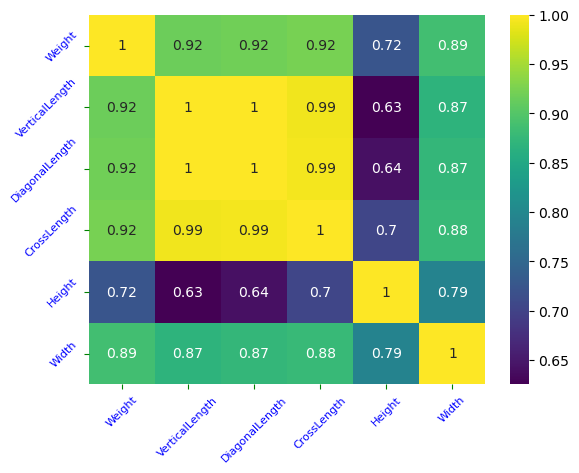

In [14]:
# 14. Visually display correlations using Seaborn's heatmap() function.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

ax=sns.heatmap(data=fish.corr(numeric_only = True), annot=True, cmap='viridis')
ax.tick_params(axis='both', rotation=45, labelsize=8, labelcolor='blue', color='green') # customize ticks and labels

# choosing colormaps: https://matplotlib.org/stable/tuturials/colors/colormaps.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

<Axes: >

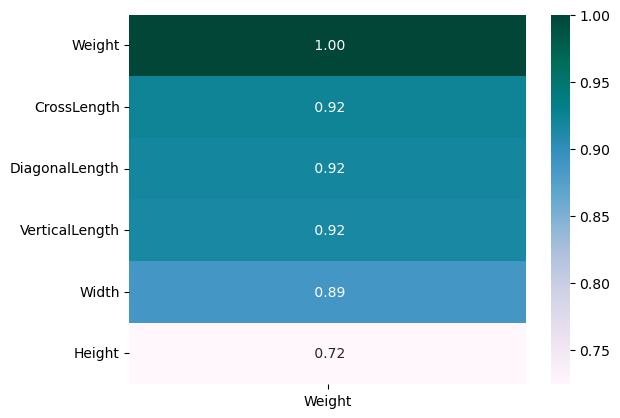

In [15]:
# 15. Visually condense correlatoins of one variable to other variables.
sns.heatmap(data=fish.corr(numeric_only = True)[['Weight']].sort_values(by='Weight', ascending=False), annot=True, cmap='PuBuGn', fmt=f' .2f')

# Note: "annot" property set to "True" so that r-values are displayed in each cell.
# Here, display color bar,
# Also note, no vmin/vmax properties used--which automatically determines min/max values from data (also, provides greater color contrast).

# Create multiple regression model

## Multiple Regression Steps

1. Identify x (IVs) and y (DV): x=Height,Width,VerticalLength, y=Weight
2. Create Train and Test datasets
3. Train model
4. Evaluate model


In [16]:
# 16. Focus on one speies: Bream
bream = fish.query('Species == "Bream"')

In [17]:
# 17. Identify x (IVs) and y (DV)
x = bream[['Height', 'Width', 'VerticalLength']]
y = bream[['Weight']]

# Notes: Combination of 'Height', 'Width', 'VerticalLength' returns a higher correlation score than individual attributes by themselves (below).
# Compare multiple regression model "x" above, against simple regession model, that is, using each o the following attributes individually:

# x = bream[['VerticalLength']]
# x = bream[['Width']]
# x = bream[['Height']]

# * BE SURE* when comparing "x" values, only *one* should be uncommented!
# See #22 for model.score results!

In [18]:
# 18. Create train and test datasets
# a. split variables into training and testing sets
# b. build model using training set, then run model on testing set

# Note: Training dataset used to *fit* the model, and test dataset is used to *evaluate* the model.
# Training data is the biggest subset of *original* dataset--used to train or fit the model.
# Test dataset is another (smaller) subset of *original* data, independent of training dataset--validates model's accuracy.
# https://www.javatpoint.com/train-and-test-datasets-in-machine-learning (bad link?)

# split variables into train and test datasets into 75:25 ratio, respectively, by importing train_test_split
# Translation: 75% of obervations for training, and remaining 25% for testing

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = 100)

In [19]:
# 19. Display x training dataset (IVs)
x_train # Note: Height, Width, and Lengths in centemeters

,Height,Width,VerticalLength
6,14.18,5.28,26.80
9,14.23,4.96,28.50
19,14.47,5.73,31.00
0,11.52,4.02,23.20
27,16.52,5.85,32.70
12,13.76,4.37,29.10
11,14.37,4.81,28.70
4,12.44,5.13,26.50
29,18.96,6.60,33.50
28,16.89,6.20,32.80


In [20]:
# 20. Display y training dataset (DV)
y_train/454 # convert weight in grams to pounds

,Weight
6,1.10
9,1.10
19,1.43
0,0.53
27,1.57
12,1.10
11,1.10
4,0.95
29,2.20
28,1.87


# Fitting model: Find best fitting line -- to accurately predict output

In [21]:
# 21. fit regression line to plot
model = LinearRegression().fit(x_train, y_train)

# Note: fit() method accepts training dataset and fits regression line to dataset.

In [22]:
# 22.display R2 correlation values--validates model through correlation score
# score() function: accepts test dataset and returns R2 correlation value--i.e., percent of change in DV attributed to IV(s).
# higher score indicates better fit!
# https://scipy-lectures.org/packages/scikit-learn/index.html
model.score(x_test, y_test)

# Note: Underneath the hood, model.score = r2_score(y_actual, y_pred). See Assignment 4!
# Automates prediction of data using x_test, and compares it with y_test--no need to manually derive y_pred.

0.9274190509163558

In [23]:
# 23. predict weight and display predicted values based upon IVs
# predict() method accepts x valuse from test dataset and returns predicted y values.
# predicts labels of data values, based on trained model
y_predicted = model.predict(x_test)

# create "predicted" DataFrame with "PredictedWeight" column using y_predicted values
# Note: DataFrames are two-dimensional data structures, which include indexes along with their associated values.
predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])

# display data structure type and "predicted" weight DataFrame values (Note: Index values assigned upon DataFrame creation.)
# type(predicted) # pandas.core.frame.DataFrame
predicted

,PredictedWeight
0,"1,009.39"
1,942.34
2,913.70
3,454.27
4,311.13
5,524.23
6,645.65
7,996.23
8,757.77


In [24]:
# 24. display data structure type and values
# type(x_test) # pandas.core.frame.DataFrame
x_test # IVs

,Height,Width,VerticalLength
33,18.64,6.75,37.40
34,17.62,6.37,38.00
31,18.08,6.29,35.00
5,13.60,4.93,26.80
1,12.48,4.31,24.00
13,13.91,5.07,29.50
18,15.63,5.13,30.90
32,18.75,6.75,36.20
26,16.36,6.09,32.00


In [25]:
# 25. display data structure type and values
# type(y_test) # pandas.core.frame.DataFrame
y_test # DV

,Weight
33,975.00
34,950.00
31,955.00
5,450.00
1,290.00
13,340.00
18,610.00
32,925.00
26,720.00


In [26]:
# 26. Join and display all columns, including PredictedWeight column
# pandas.DataFrame.join(): join multiple DataFrame objects by index at once by passing a list.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
# Note: "drop" parameter removes old index values being added as a column
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])

# reset_index: Resets index values back to default values (0, 1, 2, etc.)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

# display PredictedWeight and actual weight (DVs), with IVs
# Note: Very close predictions!
final

,PredictedWeight,Height,Width,VerticalLength,Weight
0,"1,009.39",18.64,6.75,37.40,975.00
1,942.34,17.62,6.37,38.00,950.00
2,913.70,18.08,6.29,35.00,955.00
3,454.27,13.60,4.93,26.80,450.00
4,311.13,12.48,4.31,24.00,290.00
5,524.23,13.91,5.07,29.50,340.00
6,645.65,15.63,5.13,30.90,610.00
7,996.23,18.75,6.75,36.20,925.00
8,757.77,16.36,6.09,32.00,720.00


# Residuals

- R2 value returned by score() method for test dataset provides good indication of regression model validity.
- Also, plotting residuals helps to evaluate models.

In [27]:
# 27. calculate and display residual values
# Note: "Residuals" are simply differences between DV test values and DV predicted values.
# Residual = Actual = Predicted
# positive values indicate prediction too low, negative values indicate prediction too high
final['Residual'] = final.Weight - final.PredictedWeight

final

,PredictedWeight,Height,Width,VerticalLength,Weight,Residual
0,"1,009.39",18.64,6.75,37.40,975.00,-34.39
1,942.34,17.62,6.37,38.00,950.00,7.66
2,913.70,18.08,6.29,35.00,955.00,41.30
3,454.27,13.60,4.93,26.80,450.00,-4.27
4,311.13,12.48,4.31,24.00,290.00,-21.13
5,524.23,13.91,5.07,29.50,340.00,-184.23
6,645.65,15.63,5.13,30.90,610.00,-35.65
7,996.23,18.75,6.75,36.20,925.00,-71.23
8,757.77,16.36,6.09,32.00,720.00,-37.77


<Axes: xlabel='Residual', ylabel='Density'>

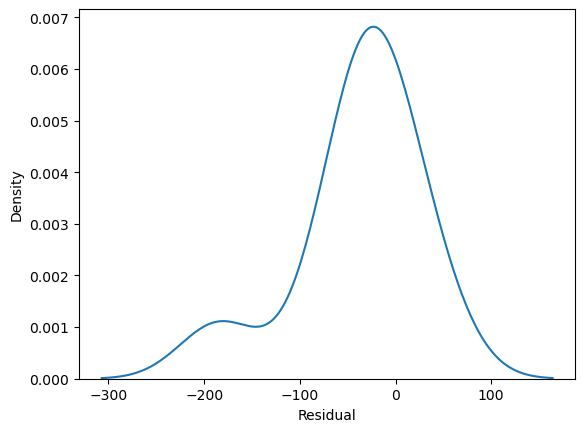

In [28]:
# 28. Plot residuals
# KDE (Kernel Density Estimate) plot: Estimates data distribution
# Visual representation of underlying distribution of data--helps to understand shape and spread of data, and identify unusual outliers.
# Produces small continuous curve (also called kernel) for every individual data point along an axis.
# Scale of "density" axis depends on data values.

# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# https://datagy.io/seaborn-kdeplot/
# https://www.tutorialspoint.com/what-is-the-purpose-of-a-density-plot-or-kde-plot

# Note: Here, most residuals w/in +100 and -100 of zero, and closely centered on zero (0)--indicating a decent model!
# Plot reveals that outliers affecting regression are on negative side of curve.
sns.kdeplot(data=final, x='Residual')

# Note: "Ideal" KDE plot display a bell-shaped curve centered over, on the X-axis, with most of the datapoints close to zero (0).